In [50]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [51]:
ruta_datos = './data/contaminantes_2020.csv'
data = pd.read_csv(ruta_datos, skiprows=10, encoding='UTF8')
data.head()

,date,id_station,id_parameter,value,unit
0,01/01/2020 01:00,ACO,CO,NaN,15
1,01/01/2020 01:00,ACO,NO,NaN,1
2,01/01/2020 01:00,ACO,NO2,NaN,1
3,01/01/2020 01:00,ACO,NOX,NaN,1
4,01/01/2020 01:00,ACO,O3,NaN,1


In [52]:
data[['date','time']] = data['date'].str.split(expand=True)
data['datetime'] = (pd.to_datetime(data.pop('date'), format='%d/%m/%Y') + 
                  pd.to_timedelta(data.pop('time') + ':00'))

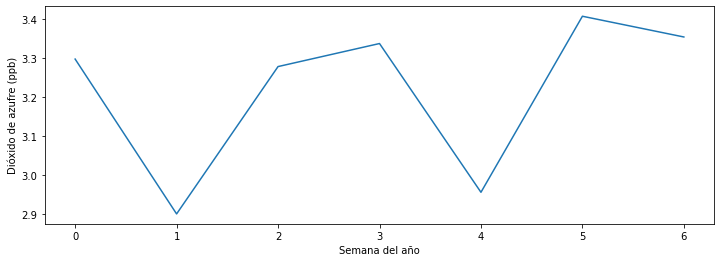

In [69]:
fig, axs = plt.subplots(figsize=(12, 4))
data[data.id_parameter == 'SO2'].groupby([data["datetime"].dt.weekday])["value"].mean().plot(kind='line', 
                                                                                         rot=0,
                                                                                      ax=axs)
plt.xlabel("Semana del año");  # custom x label using matplotlib
plt.ylabel("Dióxido de azufre (ppb)");  # custom x label using matplotlib

## Gráfica de el patrón típico de durante las horas del día del dióxido de azufre

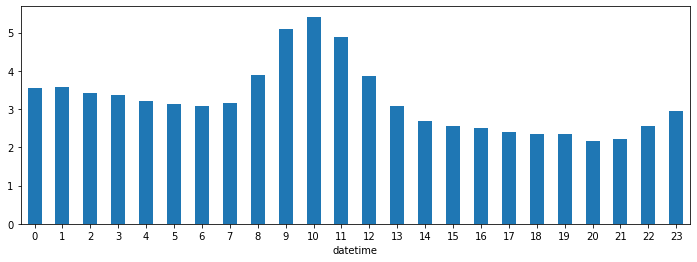

In [57]:
fig, axs = plt.subplots(figsize=(12, 4))
data[data.id_parameter == 'SO2'].groupby(
    [data["datetime"].dt.hour])["value"].mean().plot(kind='bar', 
                                                     rot=0, 
                                                     ax=axs)

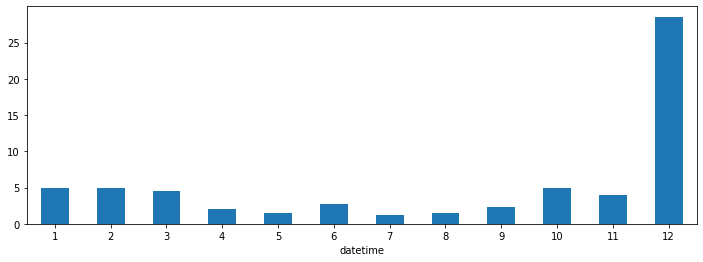

In [58]:
fig, axs = plt.subplots(figsize=(12, 4))
data[data.id_parameter == 'SO2'].groupby(
    [data["datetime"].dt.month])["value"].mean().plot(kind='bar', 
                                                     rot=0, 
                                                     ax=axs)

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

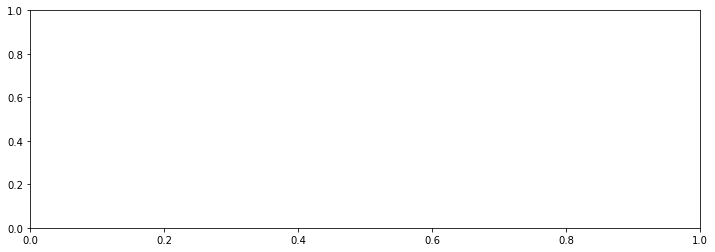

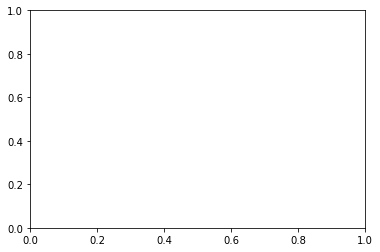

In [66]:
fig, axs = plt.subplots(figsize=(12, 4))
data[data.id_parameter == 'SO2'].boxplot('value')

In [63]:
data[data.id_parameter == 'SO2']

,id_station,id_parameter,value,unit,datetime
6,ACO,SO2,NaN,1,2020-01-01 01:00:00
15,ATI,SO2,11.0,1,2020-01-01 01:00:00
24,CAM,SO2,3.0,1,2020-01-01 01:00:00
31,MON,SO2,2.0,1,2020-01-01 01:00:00
38,CHO,SO2,NaN,1,2020-01-01 01:00:00
...,...,...,...,...,...
2098407,MPA,SO2,4.0,1,2020-12-01 00:00:00
2098414,BJU,SO2,57.0,1,2020-12-01 00:00:00
2098420,INN,SO2,0.0,1,2020-12-01 00:00:00
2098432,FAR,SO2,7.0,1,2020-12-01 00:00:00
